In [ ]:

# Dependencies and Setup
import pandas as pd
import os
import matplotlib.pyplot as plt
import requests
from config import api_key
import random 
import numpy as np

# File to Load 
city_data_to_load = "Resources/worldcities.csv"

# Read world cities and their lat and long and put them into Panda dataframe
world_city_df = pd.read_csv(city_data_to_load)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#data['column_c'] = data['column_a'].where(data['column_a'] == 0, data['column_b'])

# Determine the hemisphere of the city 
world_city_df['Hemisphere'] = np.where(world_city_df['Latitude'] >= 0, 'N','S')

# set up additional columns to hold information
world_city_df['Temperature (F)'] = ""
world_city_df['Humidity (%)'] = ""
world_city_df['Cloudiness (%)'] = ""
world_city_df['Wind Speed (mph)'] = ""

#world_city_df['hemisphere'].unique()

#x = world_city_df.groupby('Hemisphere')
#x.count()
#world_city_df.loc[world_city_df.City == 'macau']

#print(world_city_df.iloc[[100]])

#print(world_city_df.iloc[100,world_city_df.columns.get_loc("City")])

#world_city_df.iloc[100,world_city_df.columns.get_loc("Temperature (F)")] = '123'

#print(world_city_df.iloc[[100]])

#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"

# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="
#response = requests.get(query_url + 'Perth').json()
#print(response['main']['temp'])

#if requests.head(url).status_code==200:
#    response['main']['temp']


In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

i = 0
ni = 0
si = 0
# use iterrows to iterate through pandas dataframe
#while (ni < 3) & (si < 3): 
while (i < 600): 
    # Get a random number from 0 to the total record from dataframe 
    n = random.randint(0,len(world_city_df)) 
    # Assign the cityname for that particular row
    cityName = world_city_df.iloc[n,world_city_df.columns.get_loc("City")]
    temp = world_city_df.iloc[n,world_city_df.columns.get_loc("Temperature (F)")]
    #print(cityName)
    #print(f"1>{temp}<")
    # Check to see if the city temperature has already been updated 
    if world_city_df.iloc[n,world_city_df.columns.get_loc("Temperature (F)")] == "":

        response = requests.get(query_url + cityName).json()
        #print(f" 2 = {requests.head(query_url + cityName).status_code}")
        
        # Ensure the city is found from the weather api web site
        if requests.head(query_url + cityName).status_code==200:
            world_city_df.iloc[n,world_city_df.columns.get_loc('Temperature (F)')] = response['main']['temp']
            world_city_df.iloc[n,world_city_df.columns.get_loc('Humidity (%)')] = response['main']['humidity']
            world_city_df.iloc[n,world_city_df.columns.get_loc('Cloudiness (%)')] = response['clouds']['all']
            world_city_df.iloc[n,world_city_df.columns.get_loc('Wind Speed (mph)')] = response['wind']['speed']
            i = i + 1
            #print(world_city_df.iloc[[n]])
        


<function matplotlib.pyplot.show(close=None, block=None)>

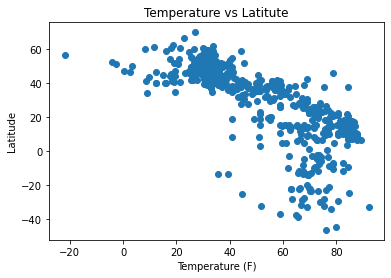

In [12]:
scatter = world_city_df.loc[world_city_df['Temperature (F)'] != ""]
temp = scatter['Temperature (F)']
lat =  scatter["Latitude"]
plt.scatter(temp,lat)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.title('Temperature vs Latitute')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

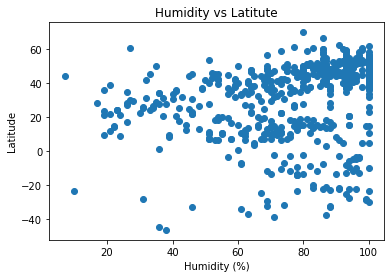

In [13]:
hum = scatter['Humidity (%)']
lat =  scatter["Latitude"]
plt.scatter(hum,lat)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title('Humidity vs Latitute')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

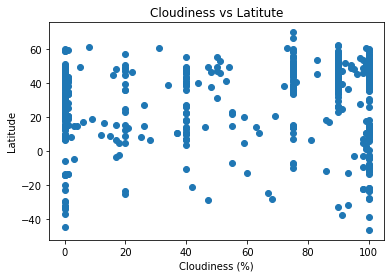

In [14]:
cloud = scatter['Cloudiness (%)']
lat =  scatter["Latitude"]
plt.scatter(cloud,lat)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title('Cloudiness vs Latitute')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

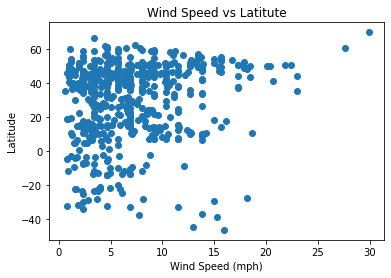

In [15]:
windspeed = scatter['Wind Speed (mph)']
lat =  scatter["Latitude"]
plt.scatter(windspeed,lat)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title('Wind Speed vs Latitute')
plt.show